Original version of the source code is from Prof. Ben Leong. 

It is revised for IT5005     

This notebook complement the lecture slides.

Note: Install pytorch and torchplot

The objective is to design an MLP to appromimate the function $f(x) = x^2$.

It involves the following:

- Developing an MLP model with random initial weights. 
        - In the class definition, we need to specify two attributes: 'input_size' and 'hidden_size'

                - 'input_size' indicates number of features in the input data (1 for this problem) 
                
                - 'hidden_size' indicates number of perceptrons in the hidden layer.                
             
                
- Selection of a loss function, optimizer and activation function


The simulated MLP consists of three layers (two hidden layers of same size and an output layer). The input is assumed to contain single feature. We assume each hidden layer consists of equal number of perceptrons

- Training the model with ground truth
        During the training phase, the input ($x_{train}$) and groundtruth (noisy $x^2_{train}$) is provided
        
- Testing the model with test data
        After training, given an input $x_{test}$, the MLP predicts  $x^2_{test}$


In summary, we simulated a continuous input and continous output variable and predict the output using trained model. This is a typical regression problem, where we train the model to predict a continuous variable

In [40]:
import torch  
import torch.nn as nn
import torchplot as plt
import math
import pprint


# Multilayer Perceptron 
    1. 3 layers, with 2 hidden layers of the same size
    2. Synthetic dataset

In [41]:
class MultilayerPerceptron(nn.Module): # 3 layers, with 2 hidden layers of the same size

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super(MultilayerPerceptron, self).__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size 
    self.hidden_size = hidden_size 

    # Defining of our layers
    self.linear = nn.Linear(self.input_size, \
                            self.hidden_size)
    self.linear2 = nn.Linear(self.hidden_size, \
                             self.hidden_size)
    self.linear3 = nn.Linear(self.hidden_size, 1)
    self.relu = nn.ReLU()  #nn.Sigmoid()
    
    
  def forward(self, x):
    linear = self.linear(x)
    linear2 = self.linear2(self.relu(linear))
    linear3 = self.linear3(self.relu(linear2))
    return linear3

Simple forward pass and parameters of the model

In [42]:
# Create our model
#one input (single feature) per sample
#8 perceptrons in each hidden layer
model = MultilayerPerceptron(1, 8)

#Priniting weights vectors/matrices
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[ 0.5957],
          [ 0.1650],
          [-0.4636],
          [-0.0349],
          [ 0.1096],
          [-0.5836],
          [-0.6080],
          [ 0.9501]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-0.2113, -0.8590,  0.9621,  0.1477,  0.6251,  0.7207, -0.4813, -0.9924],
         requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
  tensor([[-0.0350, -0.1475,  0.1578,  0.2837,  0.3490,  0.2364, -0.3188,  0.2560],
          [ 0.1172, -0.1214, -0.1946,  0.2797,  0.2248, -0.2551,  0.2431,  0.1676],
          [-0.2419, -0.1120,  0.1873, -0.0641,  0.3463, -0.0675,  0.2785,  0.2748],
          [ 0.1079,  0.2499, -0.0619, -0.3330,  0.3244,  0.3405,  0.0816,  0.1140],
          [ 0.0115, -0.2805,  0.2879,  0.2335,  0.0996,  0.2623,  0.3152, -0.2242],
          [ 0.0773,  0.1615,  0.0079, -0.2790,  0.2000,  0.2740,  0.3506, -0.1859],
          [-0.2508, -0.2305, -0.3534, -0.1652, -0.1200,  0.2958

In [43]:
import torch.optim as optim

# Define the optimizer
adam = optim.Adam(model.parameters(), lr=1e-1)
print(adam)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)


In [44]:
# Make a sample input
# 5 input samples
input = torch.randn(5, 1)
print(input)
#Pass the input through untrained model (randomly selected weights)
#model(x) is same as model.forward(x)
y = model(input)
print(y) 


tensor([[-2.3730],
        [ 0.4934],
        [ 0.0193],
        [ 0.6445],
        [-1.3380]])
tensor([[0.1686],
        [0.0680],
        [0.0867],
        [0.0571],
        [0.1034]], grad_fn=<AddmmBackward0>)


# Training the model

We are trying to approximate the function $y = x^2$

$x$ is the input and $y$ is the output. 

The objective is to find the weights of the neural network such that when $x$ is provided as input, it can produce $x^2$.


In [45]:
# Create the data ( without noise)
x_train = 5*torch.randn(100, 1)

# Add some noise to our goal y to generate our x
# We want out model to predict our original data, albeit the noise
y_train = torch.square(x_train) + torch.randn_like(x_train)

In [46]:
# Define loss using a predefined loss function
loss_function = nn.MSELoss()

# Check how our untrained model is doing now
# y_pred is the output with untrained NN
#model(x) is same as model.forward(x)
y_pred = model(x_train)
loss_function(y_pred, y_train).item()

1587.1551513671875

In [47]:
# Set the number of epoch, which determines the number of training iterations
n_epoch = 10000 

for epoch in range(n_epoch):
  # Set the gradients to 0
  # don't accumulate the gradients from past epochs
  adam.zero_grad()

  # Get the model predictions
  #model(x) is same as model.forward(x)
  y_pred = model(x_train)

  # Get the loss
  loss = loss_function(y_pred, y_train)

  # Print stats
  if epoch%1000==0:
      print(f"Epoch {epoch}: traing loss: {loss}")

  # Compute the gradients
  loss.backward()

  # Take a step to optimize the weights
  adam.step()

Epoch 0: traing loss: 1587.1551513671875
Epoch 1000: traing loss: 1.3749666213989258
Epoch 2000: traing loss: 1.359324336051941
Epoch 3000: traing loss: 1.4338985681533813
Epoch 4000: traing loss: 1.395043134689331
Epoch 5000: traing loss: 1.335882544517517
Epoch 6000: traing loss: 1.349185585975647
Epoch 7000: traing loss: 0.7948480248451233
Epoch 8000: traing loss: 0.7751429080963135
Epoch 9000: traing loss: 0.8624741435050964


In [48]:
#Printing the trained model
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[ 0.6877],
          [ 0.9621],
          [-0.8899],
          [-0.9871],
          [ 0.4741],
          [-1.5947],
          [-1.1784],
          [ 1.6139]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-6.9172, -6.7114,  0.2533, -7.7850, -0.1989, -2.6222, -6.2220, -3.3045],
         requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
  tensor([[-0.6355, -0.7480, -0.4425, -0.3167, -0.2514, -0.3640, -0.9193, -0.3445],
          [-0.6489, -0.9687, -0.9223, -0.3209, -0.4679, -0.9519,  0.2431, -0.6070],
          [ 1.1775,  0.7780, -0.0904,  2.0328, -0.0137, -0.0748,  1.6244,  1.1259],
          [ 1.6433,  1.4936,  0.1348,  2.0865, -1.2596,  1.5208,  1.4595,  1.8132],
          [ 1.4903,  0.8738,  1.4992,  2.5688, -2.0619,  1.8370,  1.7817,  1.0616],
          [-0.5332,  0.1615, -0.8205, -1.1205, -0.6467, -0.5200, -0.4802, -0.7908],
          [ 1.0761,  0.6916, -1.9511, -1.6429, -1.0700, -1.3126

# Testing the model

In [49]:
#Generate small test data
x_test = 5*torch.randn(5, 1)
print("Input test data:")
print(x_test.tolist())

#Generate ground truth for test data
y_test = torch.square(x_test)  
print("Output: Ground Truth")
print(y_test.tolist())

#Predict test data from trained model
y_test_pred = model(x_test)
print("Output of the MLP")
print(y_test_pred.tolist()) 

Input test data:
[[6.760650634765625], [4.750391960144043], [1.595767617225647], [-2.620088815689087], [0.032577771693468094]]
Output: Ground Truth
[[45.706398010253906], [22.56622314453125], [2.5464742183685303], [6.864865303039551], [0.001061311224475503]]
Output of the MLP
[[44.92090606689453], [22.47389793395996], [2.7727575302124023], [7.4234619140625], [0.014304596930742264]]


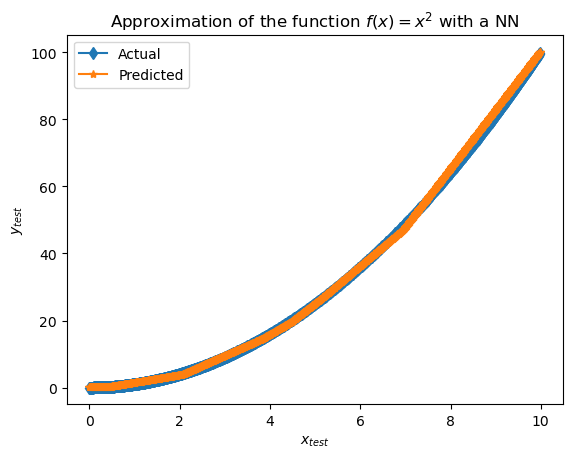

In [50]:
#Another test

#Generate test data with large number of samples
x_test = torch.arange(0,10,0.01)  
x_test = x_test.unsqueeze(1)  # adds an extra dimension at position 1
x_test = x_test #+ torch.randn_like(x_test)

torch.transpose(x_test,-1,0)
#Generate ground truth for test data
y_test = torch.square(x_test)  

#Predict test data from trained model
y_test_pred = model(x_test)



plt.plot(x_test, y_test, '-d',label ='Actual') # easy and simple
plt.plot(x_test, y_test_pred, '-*',label ='Predicted') # easy and simple

plt.xlabel('$x_{test}$')
plt.ylabel('$y_{test}$')
plt.title('Approximation of the function $f(x) = x^2$ with a NN')
plt.legend()
plt.show()